In [17]:
import seaborn as sns
import numpy as np 
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_excel('/home/onurhdogan/Documents/covid/Covid.xlsx')
df.head()

df1 = pd.melt(df, id_vars="tarih", value_name="values")
df1.head()

df2 = pd.read_excel('/home/onurhdogan/Documents/covid/Covid2.xlsx')
df2.head()

df3 = pd.read_excel('/home/onurhdogan/Documents/covid/avrupa.xlsx')
df3.head()

,gun,tr,isp,it,usa,uk,alm,fr,jap
0,1.0,1.0,2.0,3.0,15.0,9.0,16.0,12.0,53
1,2.0,5.0,2.0,3.0,15.0,9.0,16.0,12.0,59
2,3.0,6.0,2.0,3.0,15.0,9.0,16.0,12.0,66
3,4.0,18.0,2.0,3.0,15.0,9.0,16.0,12.0,74
4,5.0,47.0,2.0,4.0,15.0,9.0,16.0,12.0,84


/home/onurhdogan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/onurhdogan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


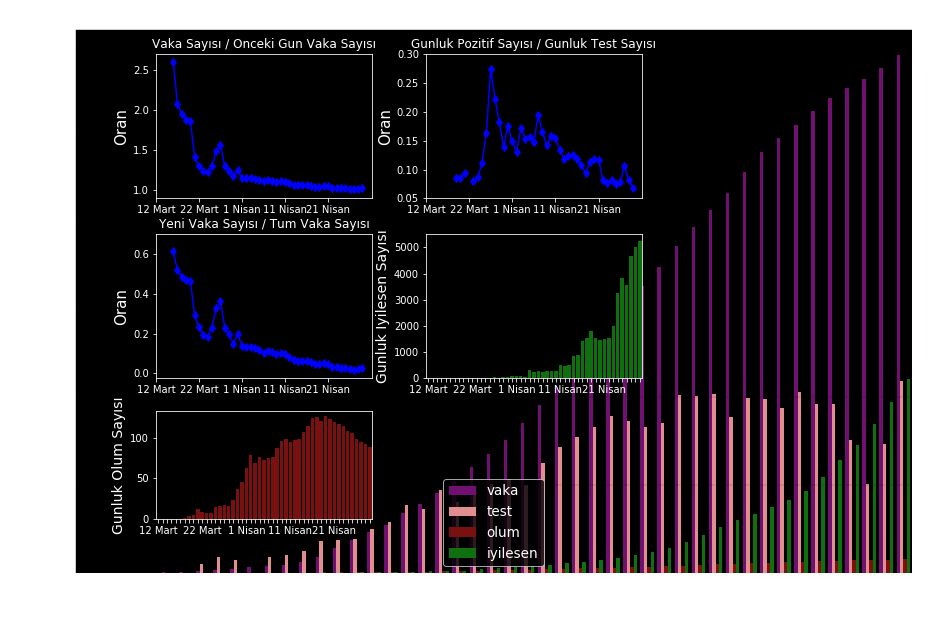

In [18]:
plt.figure(figsize=(15,10))

plt.xticks(fontsize=15.5)
plt.title("Covid-19 Salgını Türkiye Grafigi",fontsize=22)

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.2, 0.645, 0.20, 0.20])
ax3 = plt.axes([0.2, 0.395, 0.20, 0.20])
ax4 = plt.axes([0.45, 0.645, 0.20, 0.20])
ax5 = plt.axes([0.2, 0.2, 0.2, 0.15])
ax6 = plt.axes([0.45, 0.395, 0.20, 0.20])
ax7 = plt.axes([0.45, 0.645, 0.20, 0.20])

df1.tarih = df1.tarih.astype(str)
flatui = ["purple", "lightcoral", "darkred", "green"]
sns.set_palette(flatui)

m= sns.barplot(x="tarih",y="values",data=df1,hue="variable",ax=ax1,palette = sns.color_palette())

new_names=[]
for n,i in enumerate(df.tarih):
    if n%4==0:
        new_names.append(i)
    else:
        new_names.append('')
        
ax1.set_xticklabels(new_names,fontsize=14)
ax1.set_xlabel("Tarih",fontsize=19)
ax1.set_ylabel("Vaka Sayısı",fontsize=19)
ax1.axhline(y=20000,color="k",linewidth=0.15)
#ax1.axhline(y=30000,color="k",linewidth=0.15)
ax1.axhline(y=40000,color="k",linewidth=0.15)

ax1.legend(fontsize=13.5,loc=8)


ax2.plot(df2.tarih,df2.egim,linestyle="-",marker="d",label="Turkiye",color="blue")
ax2.set_xticks(ax2.get_xticks()[::10])
ax2.set_title("Vaka Sayısı / Onceki Gun Vaka Sayısı")
#ax2.set_xlabel("Tarih",fontsize=17)
ax2.set_ylabel("Oran",fontsize=15)
ax2.set_ylim(0.9,2.7)
ax2.axhline(y=1,color="k",linewidth=0.15)
ax2.axhline(y=1.25,color="k",linewidth=0.15)
ax2.axhline(y=1.5,color="k",linewidth=0.15)
ax2.axhline(y=1.75,color="k",linewidth=0.15)

ax3.plot(df2.tarih,df2.yeniVakaOran,linestyle="-",marker="d",label="Turkiye",color="blue")
ax3.set_xticks(ax3.get_xticks()[::10])
ax3.set_title("Yeni Vaka Sayısı / Tum Vaka Sayısı")
#ax3.set_xlabel("Tarih",fontsize=17)
ax3.set_ylabel("Oran",fontsize=15)
ax3.set_ylim(-0.025,0.7)
ax3.axhline(y=0,color="k",linewidth=0.15)
ax3.axhline(y=0.1,color="k",linewidth=0.15)
ax3.axhline(y=0.2,color="k",linewidth=0.15)
ax3.axhline(y=0.3,color="k",linewidth=0.15)

ax4.plot(df2.tarih,df2.testOran,linestyle="-",marker="d",label="Turkiye",color="blue")
ax4.set_xticks(ax4.get_xticks()[::10])
ax4.set_title("Gunluk Pozitif Sayısı / Gunluk Test Sayısı")
#ax4.set_xlabel("Tarih",fontsize=17)
ax4.set_ylabel("Oran",fontsize=15)
ax4.set_ylim(0.05,0.3)
ax4.axhline(y=0.1,color="k",linewidth=0.15)
ax4.axhline(y=0.15,color="k",linewidth=0.15)
ax4.axhline(y=0.2,color="k",linewidth=0.15)
ax4.axhline(y=0.25,color="k",linewidth=0.15)

sns.barplot(x='tarih',y='gunlukOlum', data=df2,  ax=ax5,color="darkred")
new_names=[]
for n,i in enumerate(df2.tarih):
    if n%10==0:
       new_names.append(i)
    else:
       new_names.append('')
ax5.set_xticklabels(new_names)
ax5.set_xlabel(" ",fontsize=5)
ax5.set_ylabel("Gunluk Olum Sayısı",fontsize=14)

sns.barplot(x='tarih',y='gunlukiyi', data=df2,  ax=ax6,color="green")
new_names=[]
for n,i in enumerate(df2.tarih):
    if n%10==0:
       new_names.append(i)
    else:
       new_names.append('')
ax6.set_xticklabels(new_names,)
ax6.set_xlabel(" ",fontsize=5)
ax6.set_ylabel("Gunluk Iyilesen Sayısı",fontsize=14)
plt.savefig("/home/onurhdogan/Documents/covid/covid3.pdf",type="pdf",dpi=300)

/home/onurhdogan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


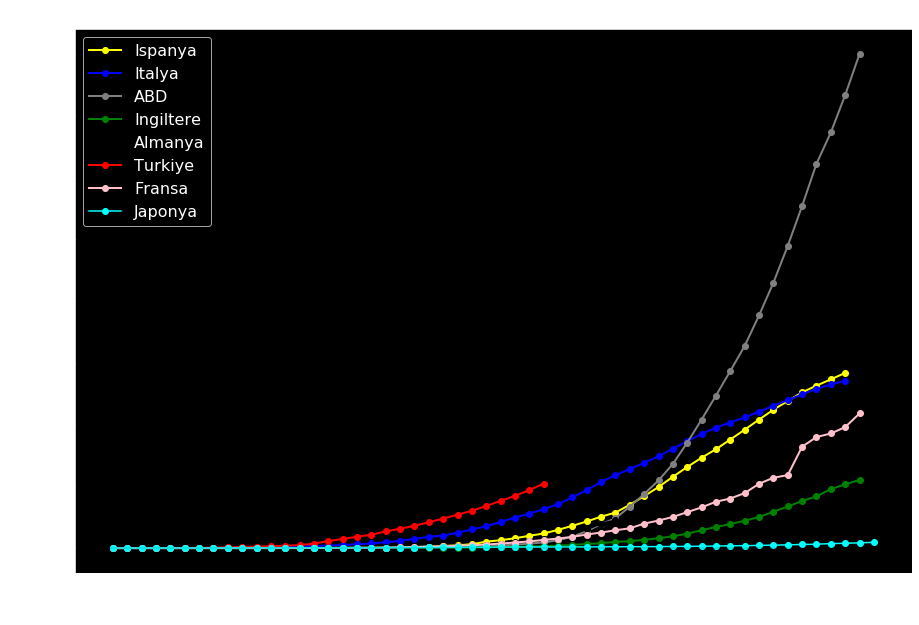

In [19]:
plt.figure(figsize=(15,10))

plt.xticks(fontsize=15.5)
plt.title("Covid-19 Salgını Dunya Grafigi",fontsize=22)

ax1 = plt.axes()  # standard axes

df3.gun = df3.gun.astype(str)

plt.plot(df3.gun,df3.isp,linestyle="-",marker="o",linewidth=2,label="Ispanya",color="yellow")
plt.plot(df3.gun,df3.it,linestyle="-",marker="o",linewidth=2,label="Italya",color="blue")
plt.plot(df3.gun,df3.usa,linestyle="-",marker="o",linewidth=2,label="ABD",color="grey")
plt.plot(df3.gun,df3.uk,linestyle="-",marker="o",linewidth=2,label="Ingiltere",color="green")
plt.plot(df3.gun,df3.alm,linestyle="-",marker="o",linewidth=2,label="Almanya",color="k")
plt.plot(df3.gun,df3.tr,linestyle="-",marker="o",linewidth=2,label="Turkiye",color="red")
plt.plot(df3.gun,df3.fr,linestyle="-",marker="o",linewidth=2,label="Fransa",color="pink")
plt.plot(df3.gun,df3.jap,linestyle="-",marker="o",label="Japonya",color="cyan")

plt.xticks(range(0,len(df3.gun),3))

ax1.axhline(y=0,color="k",linewidth=0.2)
ax1.legend(fontsize=16,loc=0)
ax1.set_xlabel("Ilk Vakadan itibaren Gun Sayısı",fontsize=19)
ax1.set_ylabel("Vaka Sayısı (Normal)",fontsize=19)

plt.savefig("/home/onurhdogan/Documents/covid/covid4.pdf",type="pdf",dpi=300)

/home/onurhdogan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


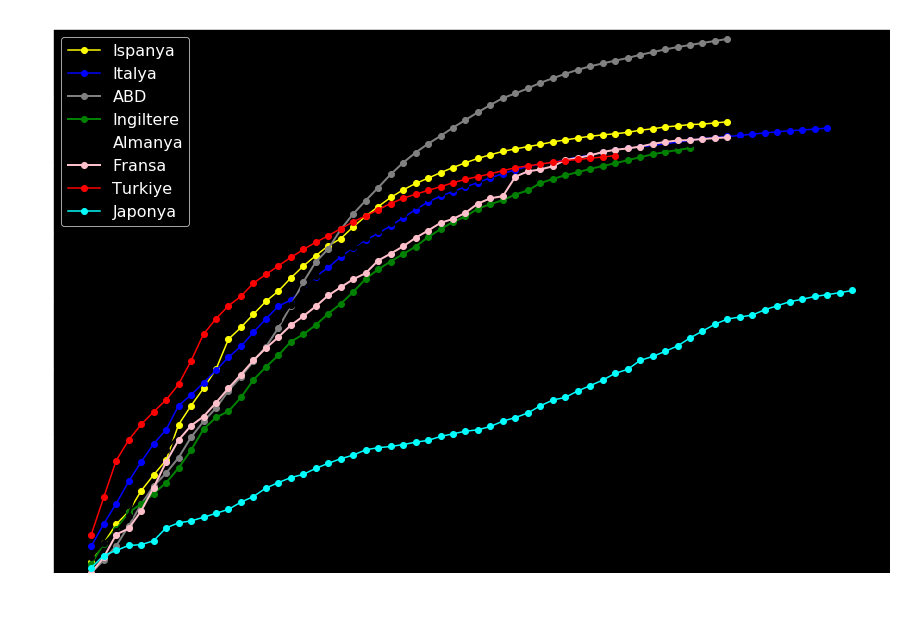

In [20]:
import numpy as np

df3 = pd.read_excel('/home/onurhdogan/Documents/covid/avrupa2.xlsx')
df3.head()

df3.tr = np.log10(df3.tr) 
df3.isp = np.log10(df3.isp) 
df3.it = np.log10(df3.it) 
df3.usa = np.log10(df3.usa) 
df3.alm = np.log10(df3.alm) 
df3.uk = np.log10(df3.uk) 
df3.fr = np.log10(df3.fr) 
df3.jap = np.log10(df3.jap)


plt.figure(figsize=(15,10))

plt.xticks(fontsize=15.5)
plt.title("Covid-19 Salgını Dunya Grafigi",fontsize=22)

ax1 = plt.axes()  # standard axes

df3.gun = df3.gun.astype(str)
plt.plot(df3.gun,df3.isp,linestyle="-",marker="o",label="Ispanya",color="yellow")
plt.plot(df3.gun,df3.it,linestyle="-",marker="o",label="Italya",color="blue")
plt.plot(df3.gun,df3.usa,linestyle="-",marker="o",linewidth=2,label="ABD",color="grey")
plt.plot(df3.gun,df3.uk,linestyle="-",marker="o",linewidth=2,label="Ingiltere",color="green")
plt.plot(df3.gun,df3.alm,linestyle="-",marker="o",linewidth=2,label="Almanya",color="k")
plt.plot(df3.gun,df3.fr,linestyle="-",marker="o",linewidth=2,label="Fransa",color="pink")
plt.plot(df3.gun,df3.tr,linestyle="-",marker="o",label="Turkiye",color="red")
plt.plot(df3.gun,df3.jap,linestyle="-",marker="o",label="Japonya",color="cyan")


plt.xticks(range(0,len(df3.gun),2))

ax1.axhline(y=0,color="k",linewidth=0.2)
ax1.legend(fontsize=16,loc=0)
ax1.set_xlabel("100. Vakadan itibaren Gun Sayısı",fontsize=19)
ax1.set_ylabel("Vaka Sayısı(Logaritmik)",fontsize=19)

plt.ylim(2,6)
plt.savefig("/home/onurhdogan/Documents/covid/covid5.pdf",type="pdf",dpi=300)

/home/onurhdogan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
No handles with labels found to put in legend.
No handles with labels found to put in legend.


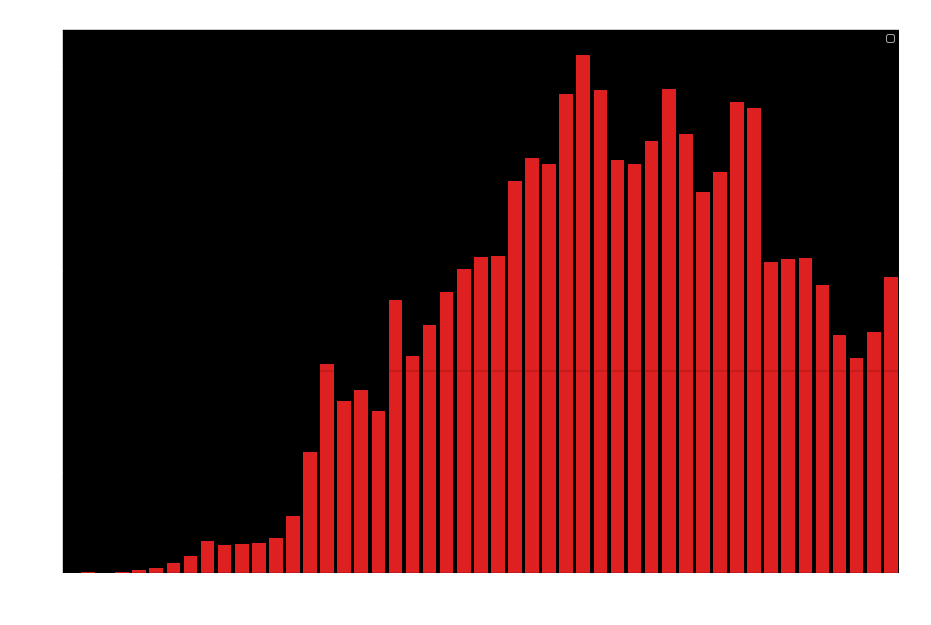

In [21]:
df2 = pd.read_excel('/home/onurhdogan/Documents/covid/Covid2.xlsx')

plt.figure(figsize=(15,10))

plt.xticks(fontsize=15.5)
plt.title("Turkiye Covid-19 Gunluk Yeni Vaka Sayısı",fontsize=22)

ax1 = plt.axes()  # standard axes

sns.barplot(x='tarih',y='yeniVaka', data=df2,  ax=ax1,color="red")

new_names=[]
for n,i in enumerate(df2.tarih):
    if n%4==0:
       new_names.append(i)
    else:
       new_names.append('')
ax1.set_xticklabels(new_names)

ax1.axhline(y=0,color="k",linewidth=0.2)
ax1.axhline(y=2000,color="k",linewidth=0.2)

ax1.legend(fontsize=16,loc=0)
ax1.set_xlabel("Tarih",fontsize=19)
ax1.set_ylabel("Gunluk Yeni Vaka Sayısı",fontsize=19)
ax1.legend(loc=1)

plt.savefig("/home/onurhdogan/Documents/covid/covid6.pdf",type="pdf",dpi=300)

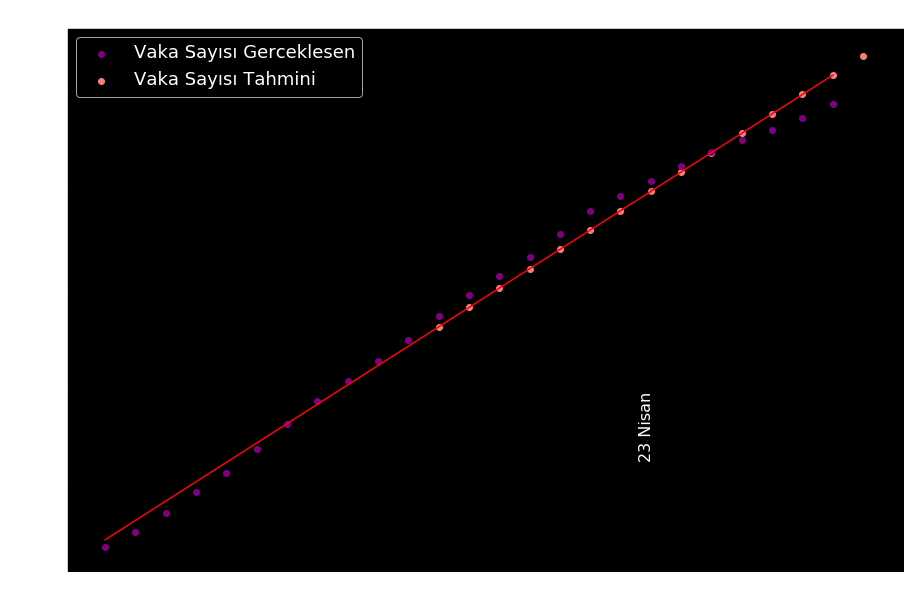

In [22]:
df4 = pd.read_excel('/home/onurhdogan/Documents/covid/tr.xlsx')

plt.figure(figsize=(15,10))

from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

x = df4.gun.values.reshape(-1,1)   # numpy'a cevirmek icin values dedik / -1 tamamını al,1de kolon
y = df4.tr.values.reshape(-1,1)  

linear_reg.fit(x,y)        # x ve y 'yi fit et dedik
x_yeni = [36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
x_yeni_ = np.array(x_yeni).reshape(-1,1)

y_predict = linear_reg.predict(x_yeni_)

array = np.array(df4.gun.values).reshape(-1,1)
axes = plt.gca()
plt.scatter(df4.gun,df4.tr.values,label="Vaka Sayısı Gerceklesen",zorder=2)

plt.yticks(fontsize=14)
plt.axhline(y=50000,color="k",linewidth=0.2)
plt.axhline(y=70000,color="k",linewidth=0.2)
plt.text(42.6,45000,"23 Nisan",rotation=90,fontsize=16)
#plt.text(32.6,30000,"13 Nisan",rotation=90,fontsize=16)
#plt.axvline(x=33,color="red",linewidth=1)

plt.axhline(y=40000,color="k",linewidth=0.2)
#plt.axvline(x=32,color="k",linewidth=0.2)

plt.axhline(y=100000,color="k",linewidth=0.2)
plt.axvline(x=43,color="k",linewidth=0.2)

y_head = linear_reg.predict(x)

plt.xticks(range(0,len(df4.gun),2))


plt.xlabel("ilk Vakadan itibaren Gun sayısı",fontsize=16)

plt.plot(array,y_head,color = "red")
plt.scatter(x_yeni,y_predict,label="Vaka Sayısı Tahmini")

plt.title("Covid 19 Turkiye Lineer Regresyon Modeli",fontsize=20)
plt.legend(loc=0,fontsize=18)

plt.savefig("/home/onurhdogan/Documents/covid/covid7.pdf",type="pdf",dpi=300)


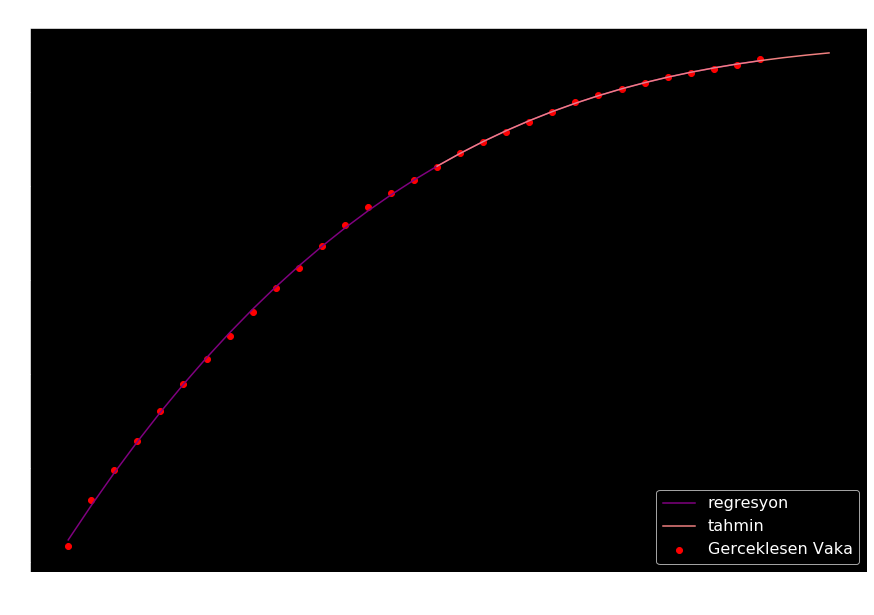

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(15,10))

polynomial_regression = PolynomialFeatures(degree=3)

df5 = pd.read_excel('/home/onurhdogan/Documents/covid/tr2.xlsx')
df5.tr = np.log10(df5.tr)

x_yeni = [26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
x_yeni_ = np.array(x_yeni).reshape(-1,1)

x = df5.gun.values.reshape(-1,1)
y = df5.tr.values.reshape(-1,1)  

x_polynomial = polynomial_regression.fit_transform(x)
linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

y_head2 = linear_regression2.predict(x_polynomial)

x_yeni = [35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52]
#x_yeni_ = np.array(x_yeni).reshape(-1,1)

#x_yeni = [29,30,31,32,33,34,35]
x_yeni_ = np.array(x_yeni).reshape(-1,1)

x_polynomial_tahmin = polynomial_regression.fit_transform(x_yeni_)

#df5.gun = df3.gun.astype(str)
#plt.xticks(range(0,len(df5.gun),2))

y_head3 = linear_regression2.predict(x_polynomial_tahmin)
plt.title("Covid 19 Turkiye Vaka Sayısı Polinom Regresyon Modeli",fontsize=20)
plt.xlabel("ilk Vakadan itibaren Gun sayısı",fontsize=16)
#plt.axvline(x=43,color="red",linewidth=1)
plt.axhline(y=5,color="k",linewidth=0.2)

plt.scatter(x,y,color="red",label="Gerceklesen Vaka") #,label="vaka")
plt.plot(x,y_head2,label="regresyon")
plt.plot(x_yeni_,y_head3,label="tahmin")
plt.legend(fontsize=16)
#plt.xticks(range(min(df5.gun),max(df5.gun)),fontsize=16)


plt.savefig("/home/onurhdogan/Documents/covid/covid8.pdf",type="pdf",dpi=300)



In [24]:
from sklearn.metrics import r2_score
print(r2_score(y,y_head2))

0.9997868075165587


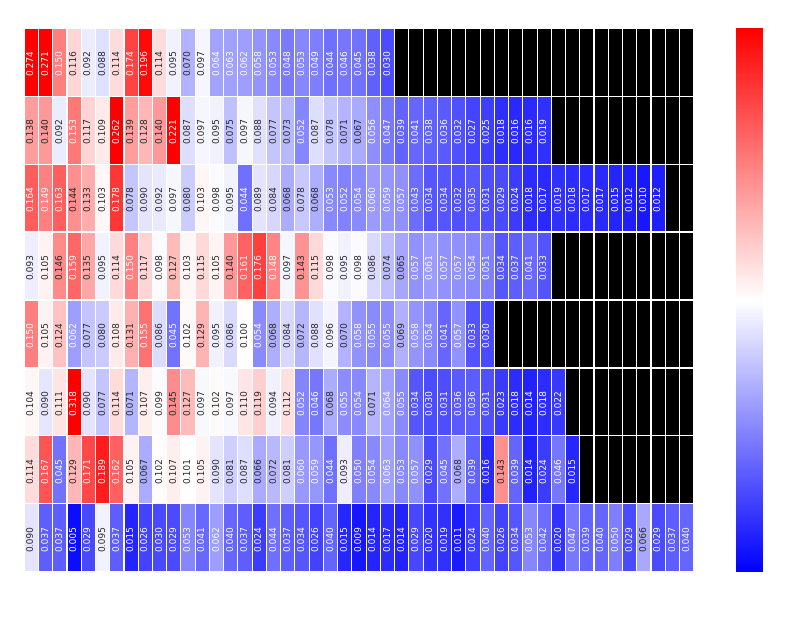

In [25]:
import numpy as np
plt.figure(figsize=(15,10))
df3 = pd.read_excel('/home/onurhdogan/Documents/covid/avrupa3.xlsx')
df3 = df3.transpose()
df3= df3.drop('gun')
ax1= plt.axes()
plt.title("Covid 19 Turkiye Logaritmik Vaka Egimleri (Gunluk)",fontsize=20)


ax1 = sns.heatmap(df3,robust=True,cmap='bwr',vmin=0,vmax=0.2,linewidths=.15,annot=True,fmt=".3f",annot_kws={"size": 9,"rotation":90})
ax1.set_xlabel("100. Vakadan itibaren Logaritmik Vaka artısı egimleri(Gunluk)",fontsize=17)

plt.savefig("/home/onurhdogan/Documents/covid/covid9.pdf",type="pdf",dpi=300)

/home/onurhdogan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


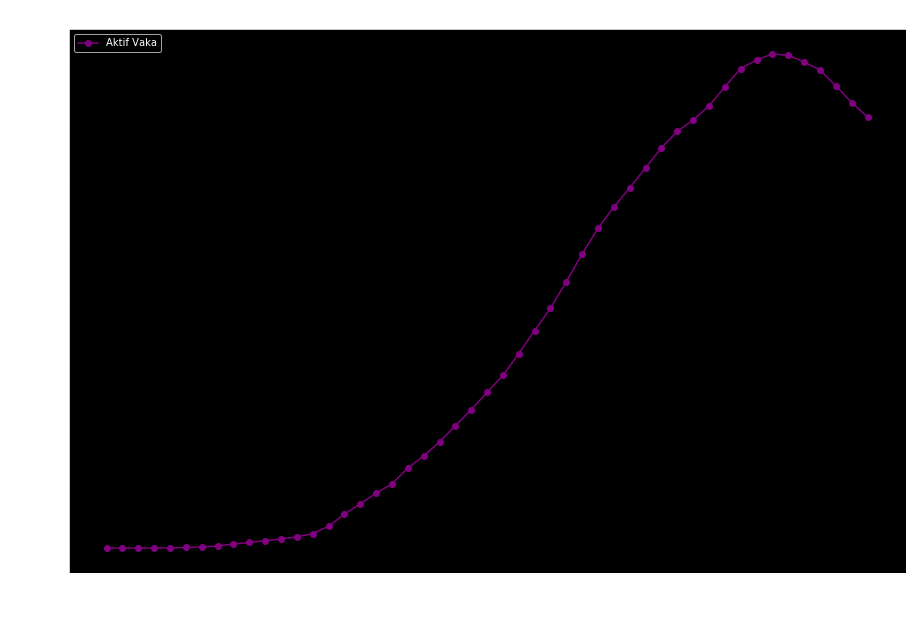

In [26]:
df2 = pd.read_excel('/home/onurhdogan/Documents/covid/Covid2.xlsx')

plt.figure(figsize=(15,10))

plt.xticks(fontsize=15.5)
plt.title("Turkiye Covid-19 Gunluk Aktif Vaka Sayısı",fontsize=22)

ax1 = plt.axes()  # standard axes

plt.plot(df2.tarih,df2.aktifVaka,linestyle="-",marker="o",label="Aktif Vaka",color="purple")

new_names=[]
for n,i in enumerate(df2.tarih):
    if n%4==0:
       new_names.append(i)
    else:
       new_names.append('')
ax1.set_xticklabels(new_names)

#ax1.axhline(y=0,color="k",linewidth=0.2)
#ax1.axhline(y=2000,color="k",linewidth=0.2)

ax1.legend(fontsize=16,loc=0)
ax1.set_xlabel("Tarih",fontsize=19)
ax1.set_ylabel("Gunluk Aktif Vaka Sayısı",fontsize=19)
ax1.legend(loc=2)

plt.savefig("/home/onurhdogan/Documents/covid/covid10.pdf",type="pdf",dpi=300)

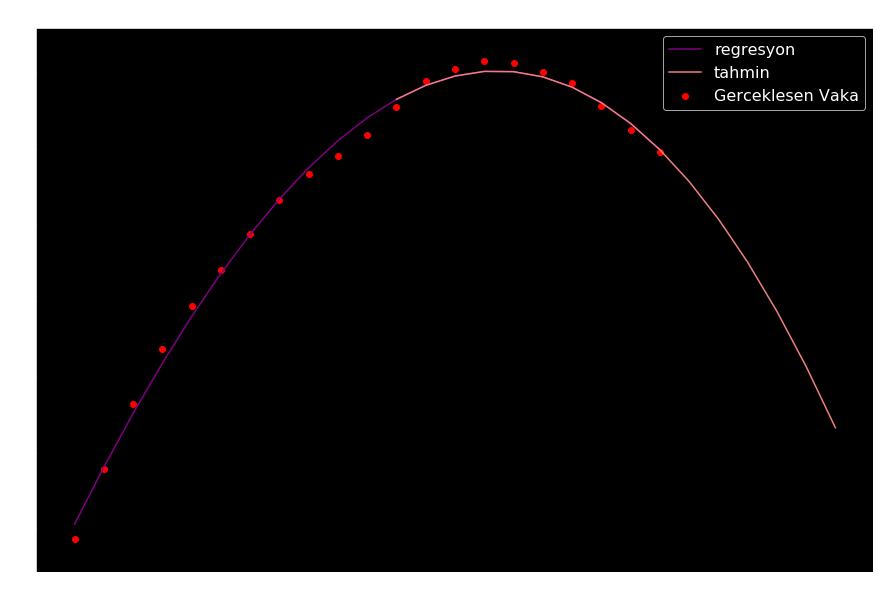

In [27]:
df5 = pd.read_excel('/home/onurhdogan/Documents/covid/aktifVaka.xlsx')

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(15,10))

polynomial_regression = PolynomialFeatures(degree=3)

df5.aktifVaka = np.log10(df5.aktifVaka)

x = df5.gun.values.reshape(-1,1)
y = df5.aktifVaka.values.reshape(-1,1)  

x_polynomial = polynomial_regression.fit_transform(x)
linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

y_head2 = linear_regression2.predict(x_polynomial)

x_yeni = [41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56] #57,58,59,60,61,62,63,64] #65,66,67,68,69,70,71]
x_yeni_ = np.array(x_yeni).reshape(-1,1)

x_polynomial_tahmin = polynomial_regression.fit_transform(x_yeni_)

y_head3 = linear_regression2.predict(x_polynomial_tahmin)
plt.title("Covid 19 Aktif Vaka Turkiye Polinom Regresyon Modeli",fontsize=20)
plt.xlabel("ilk Vakadan itibaren Gun sayısı",fontsize=16)
#plt.axvline(x=43,color="red",linewidth=1)

plt.scatter(x,y,color="red",label="Gerceklesen Vaka") #,label="vaka")
plt.plot(x,y_head2,label="regresyon")
plt.plot(x_yeni_,y_head3,label="tahmin")
plt.legend(fontsize=16)
#plt.xticks(range(min(df5.gun),max(df5.gun)),fontsize=16)


plt.savefig("/home/onurhdogan/Documents/covid/covid11.pdf",type="pdf",dpi=300)




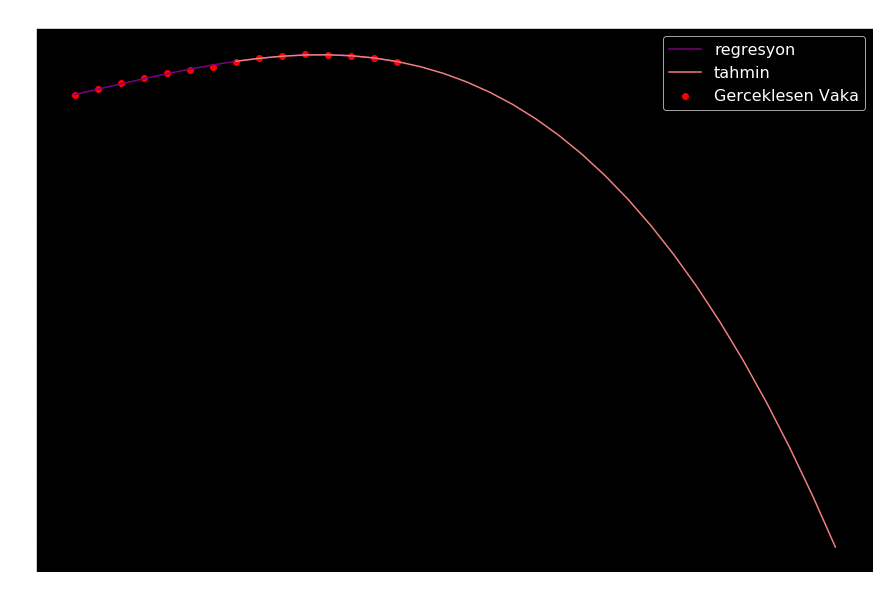

In [28]:
df5 = pd.read_excel('/home/onurhdogan/Documents/covid/aktifVaka2.xlsx')

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(15,10))

polynomial_regression = PolynomialFeatures(degree=3)

df5.aktifVaka = np.log10(df5.aktifVaka)

x = df5.gun.values.reshape(-1,1)
y = df5.aktifVaka.values.reshape(-1,1)  

x_polynomial = polynomial_regression.fit_transform(x)
linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

y_head2 = linear_regression2.predict(x_polynomial)

x_yeni = [41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67] #65,66,67,68,69,70,71]
x_yeni_ = np.array(x_yeni).reshape(-1,1)

x_polynomial_tahmin = polynomial_regression.fit_transform(x_yeni_)

y_head3 = linear_regression2.predict(x_polynomial_tahmin)
plt.title("Covid 19 Aktif Vaka Turkiye Polinom Regresyon Modeli",fontsize=20)
plt.xlabel("ilk Vakadan itibaren Gun sayısı",fontsize=16)
#plt.axvline(x=43,color="red",linewidth=1)

plt.scatter(x,y,color="red",label="Gerceklesen Vaka") #,label="vaka")
plt.plot(x,y_head2,label="regresyon")
plt.plot(x_yeni_,y_head3,label="tahmin")
plt.legend(fontsize=16)
#plt.xticks(range(min(df5.gun),max(df5.gun)),fontsize=16)


#plt.savefig("/home/onurhdogan/Documents/covid/covid11.pdf",type="pdf",dpi=300)


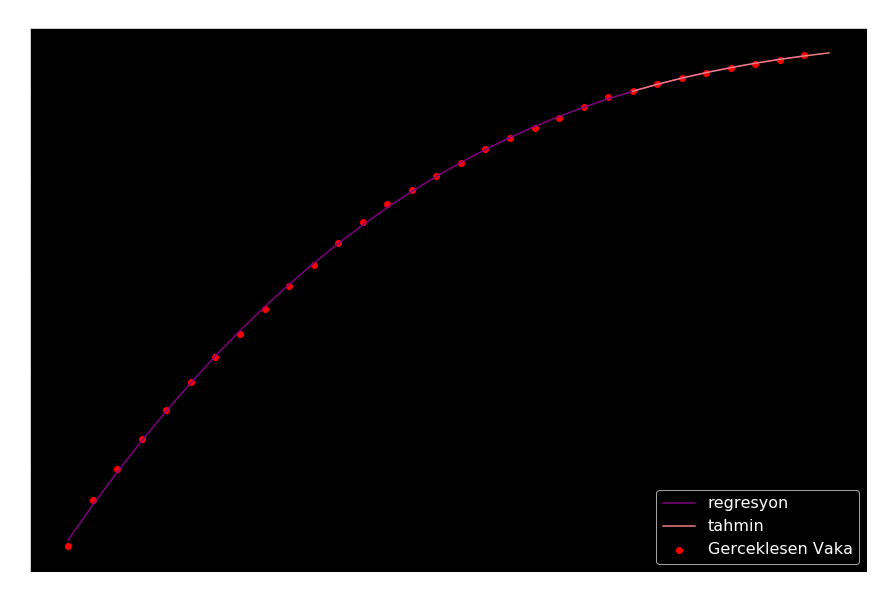

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(15,10))

polynomial_regression = PolynomialFeatures(degree=3)

df5 = pd.read_excel('/home/onurhdogan/Documents/covid/tr2.xlsx')
df5.tr = np.log10(df5.tr)

x = df5.gun.values.reshape(-1,1)
y = df5.tr.values.reshape(-1,1)  

x_polynomial = polynomial_regression.fit_transform(x)
linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

y_head2 = linear_regression2.predict(x_polynomial)

x_yeni = [42,43,44,45,46,47,48,49,50]

x_yeni_ = np.array(x_yeni).reshape(-1,1)

x_polynomial_tahmin = polynomial_regression.fit_transform(x_yeni_)


y_head3 = linear_regression2.predict(x_polynomial_tahmin)
plt.title("Covid 19 Turkiye Vaka Sayısı Polinom Regresyon Modeli",fontsize=20)
plt.xlabel("ilk Vakadan itibaren Gun sayısı",fontsize=16)
plt.axhline(y=5,color="k",linewidth=0.2)

plt.scatter(x,y,color="red",label="Gerceklesen Vaka") #,label="vaka")
plt.plot(x,y_head2,label="regresyon")
plt.plot(x_yeni_,y_head3,label="tahmin")
plt.legend(fontsize=16)


plt.savefig("/home/onurhdogan/Documents/covid/pngler/1.png",type="png",dpi=300)



/home/onurhdogan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/home/onurhdogan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/home/onurhdogan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`m

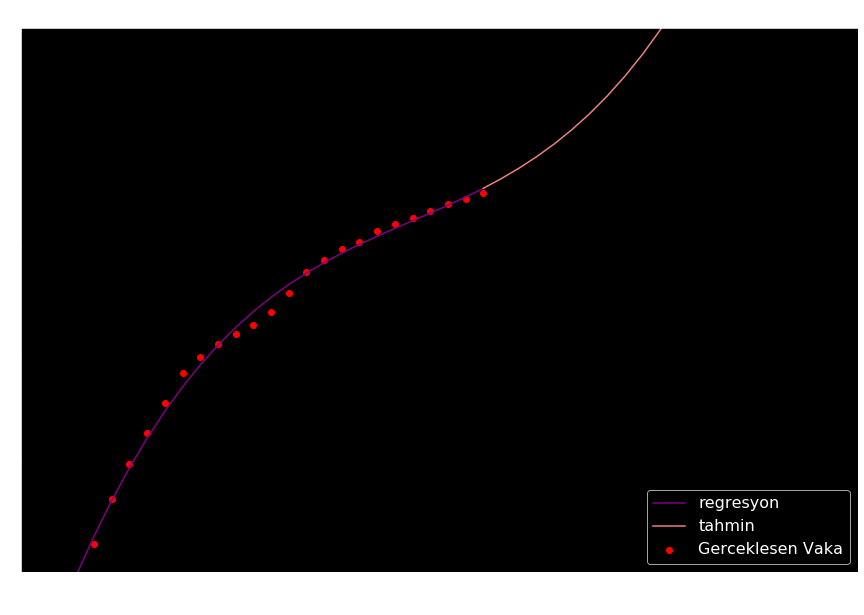

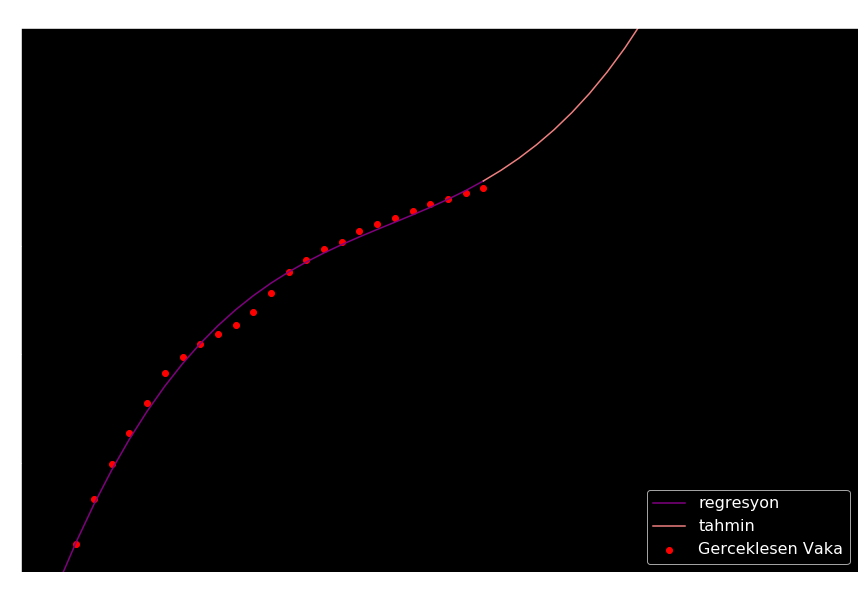

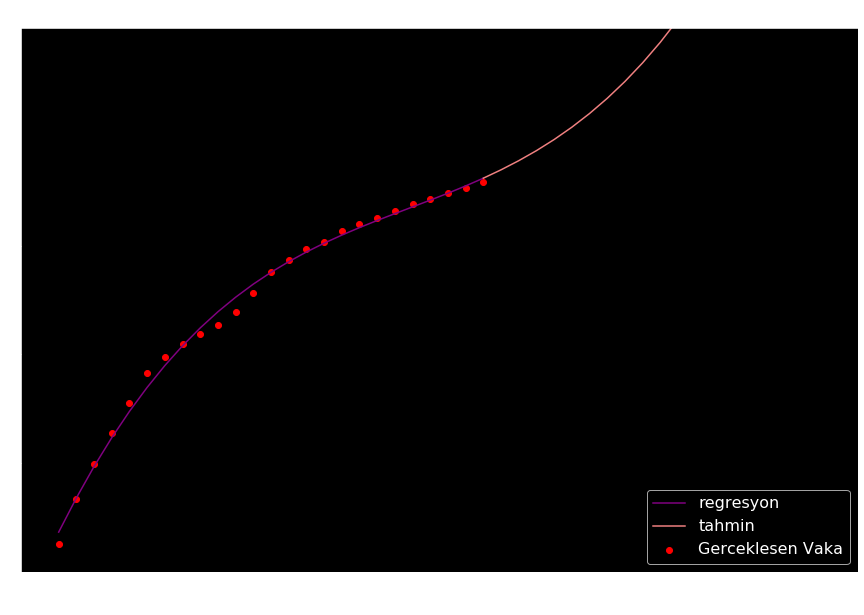

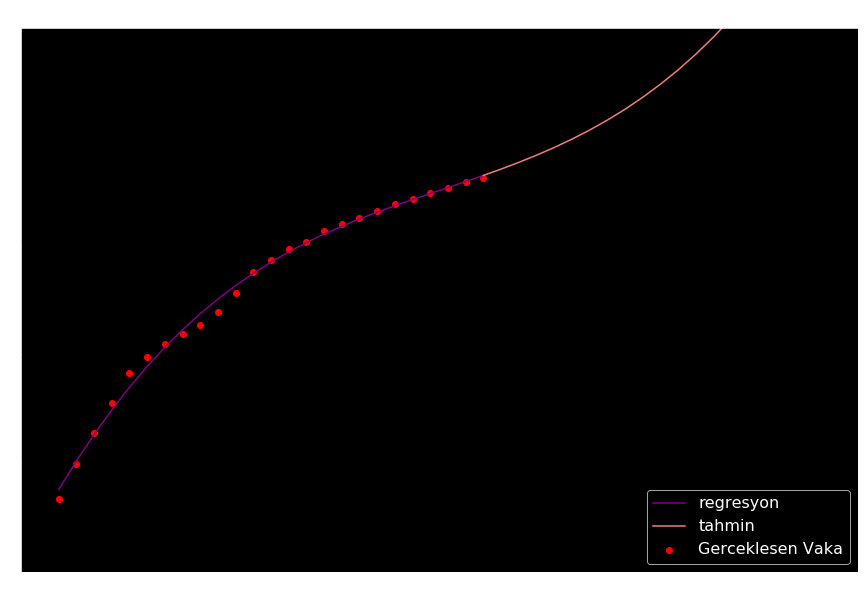

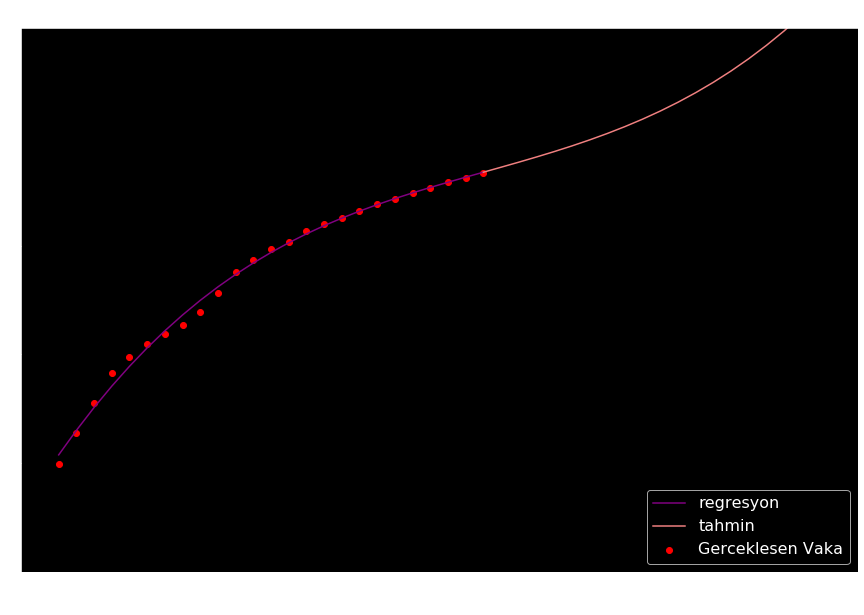

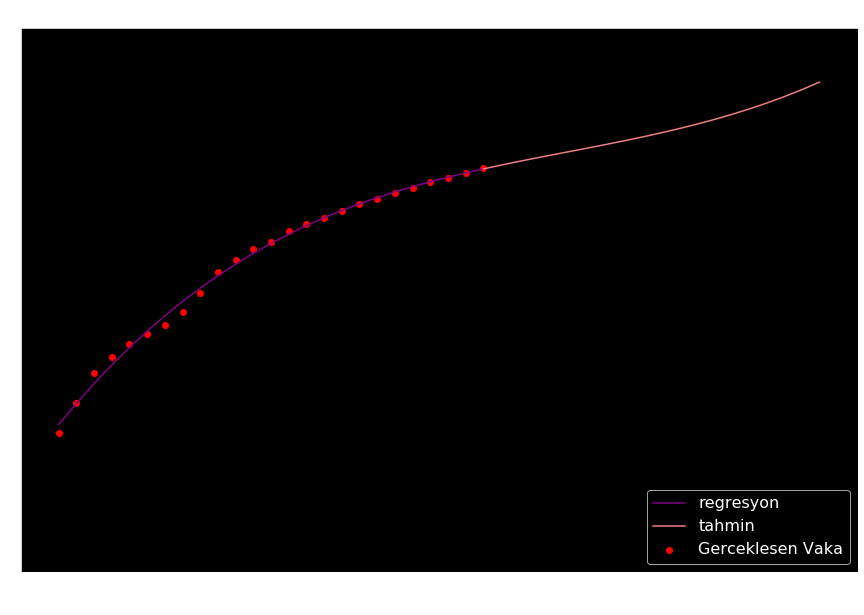

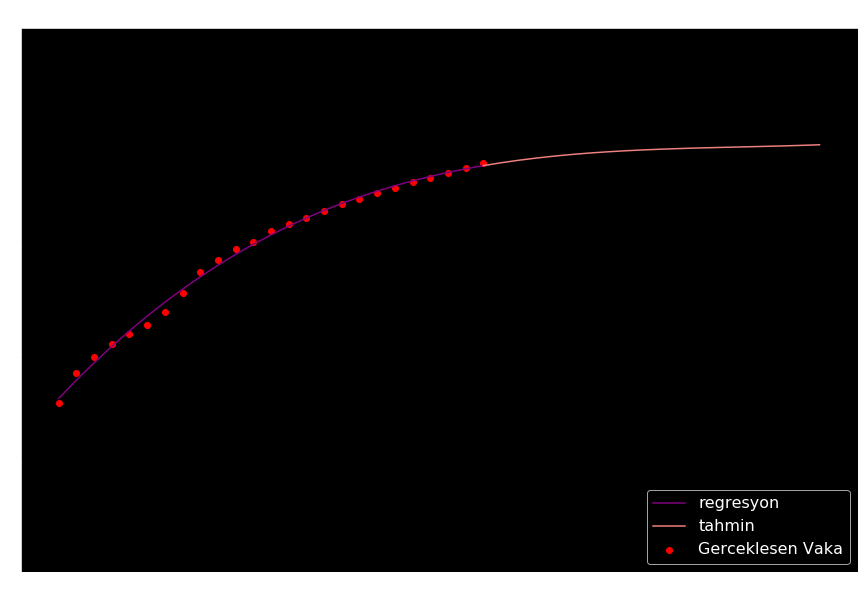

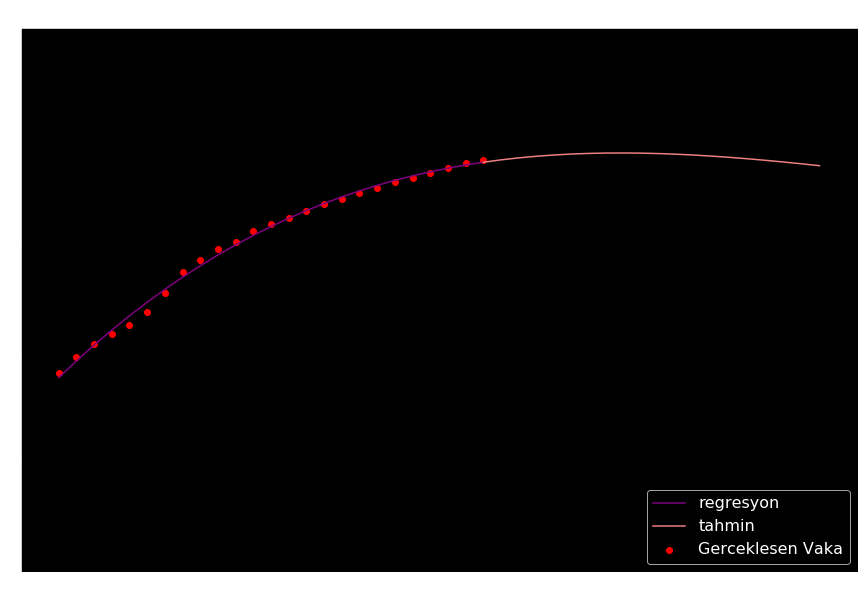

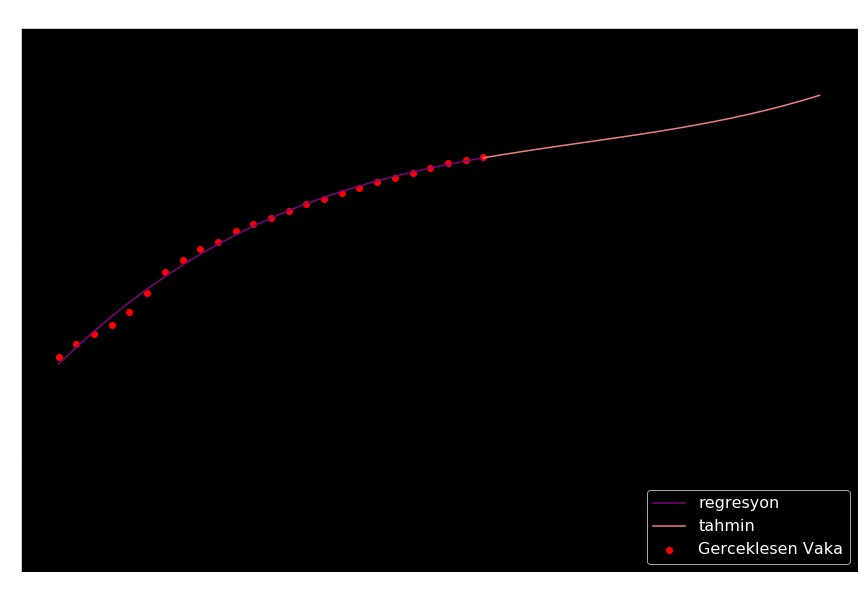

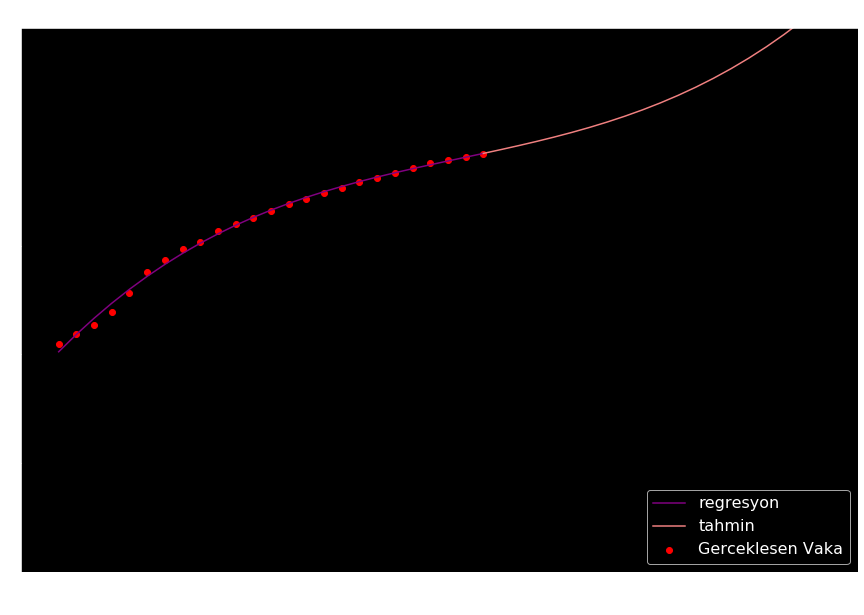

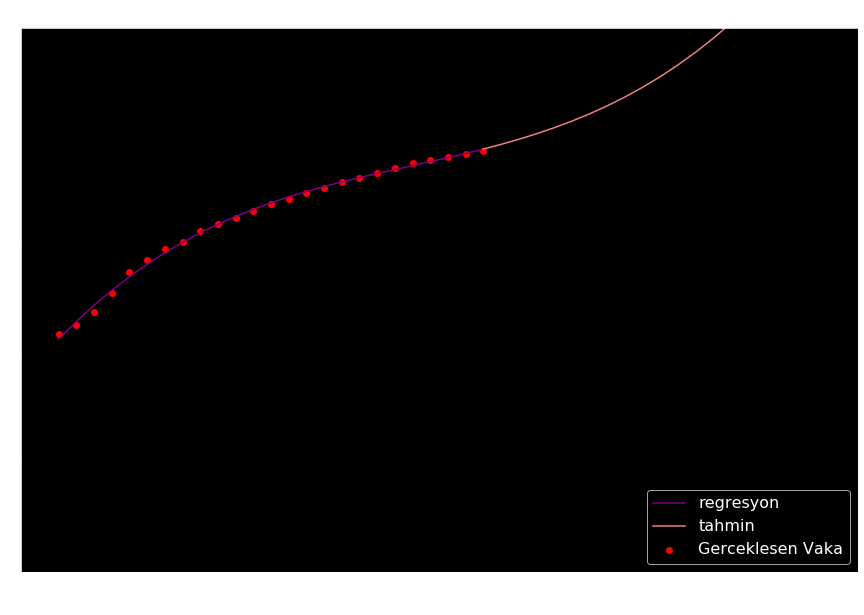

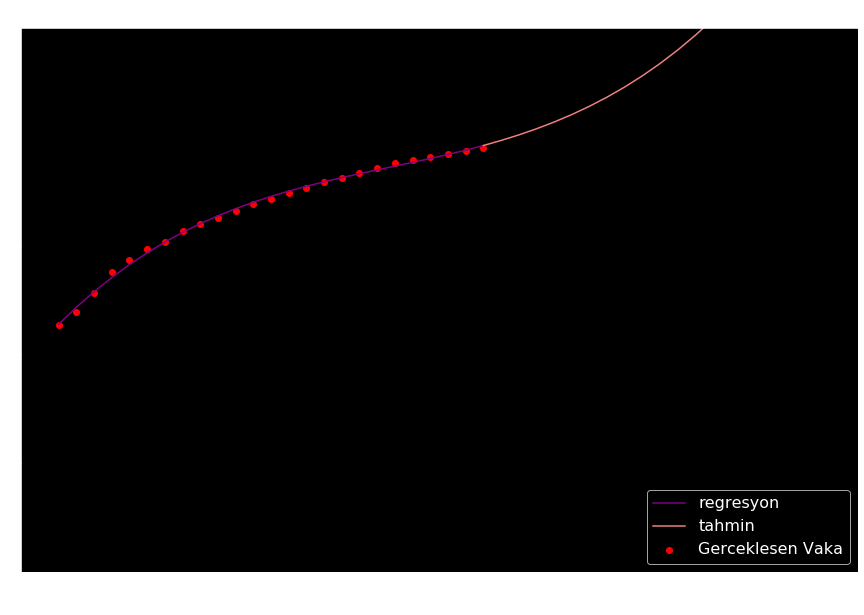

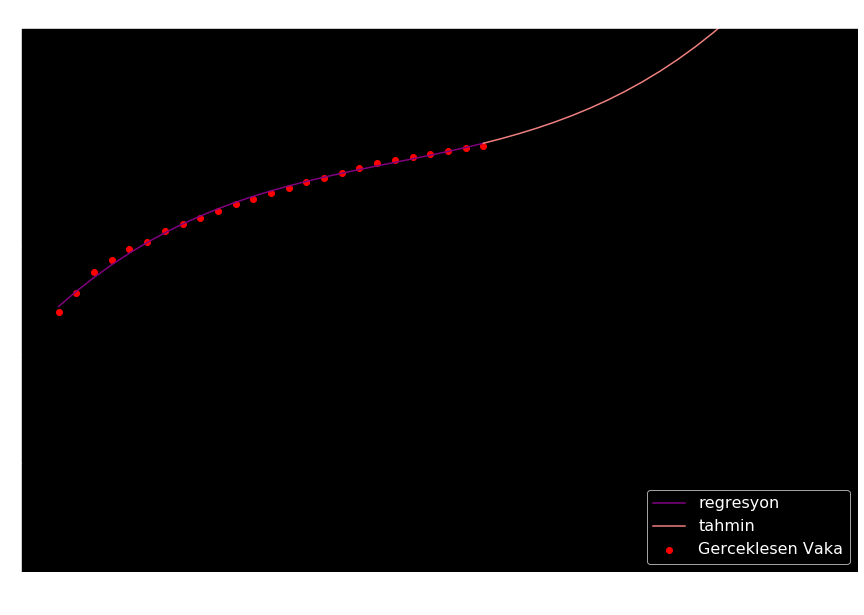

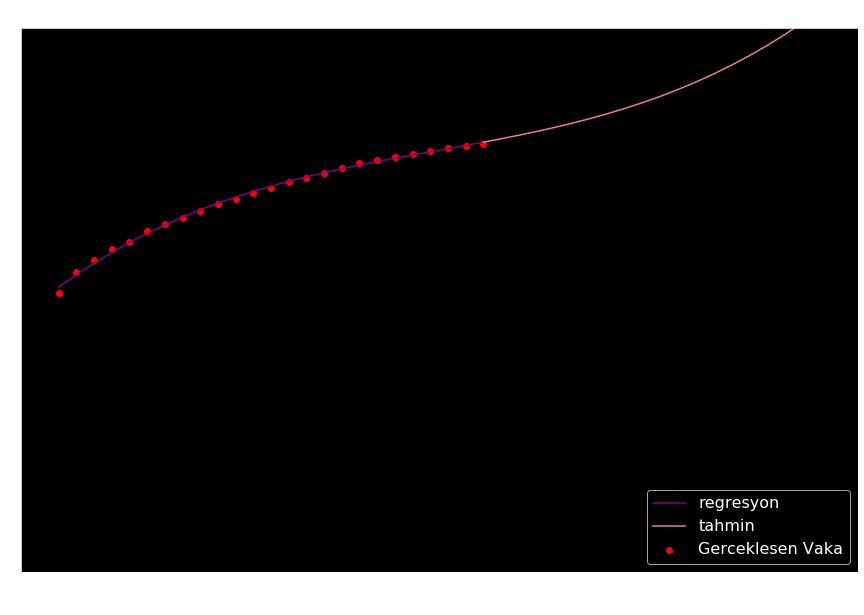

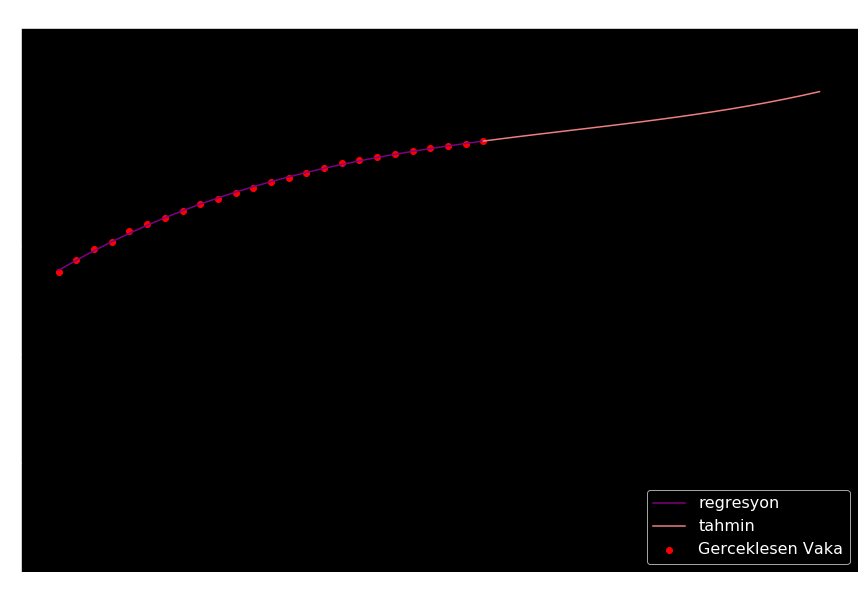

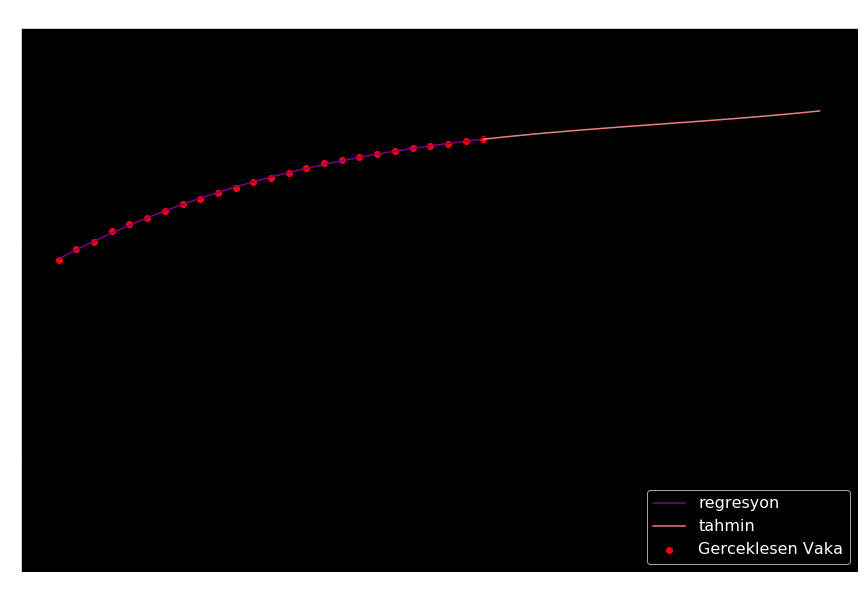

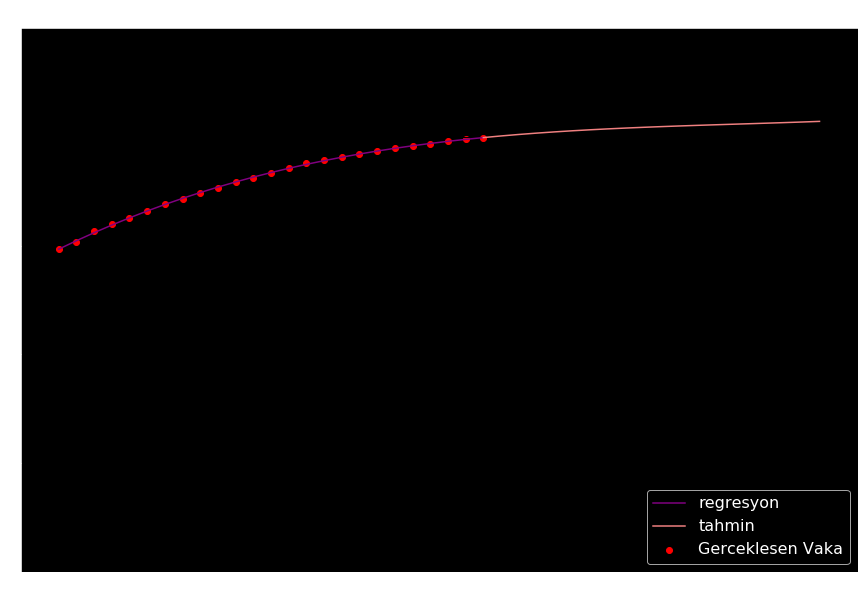

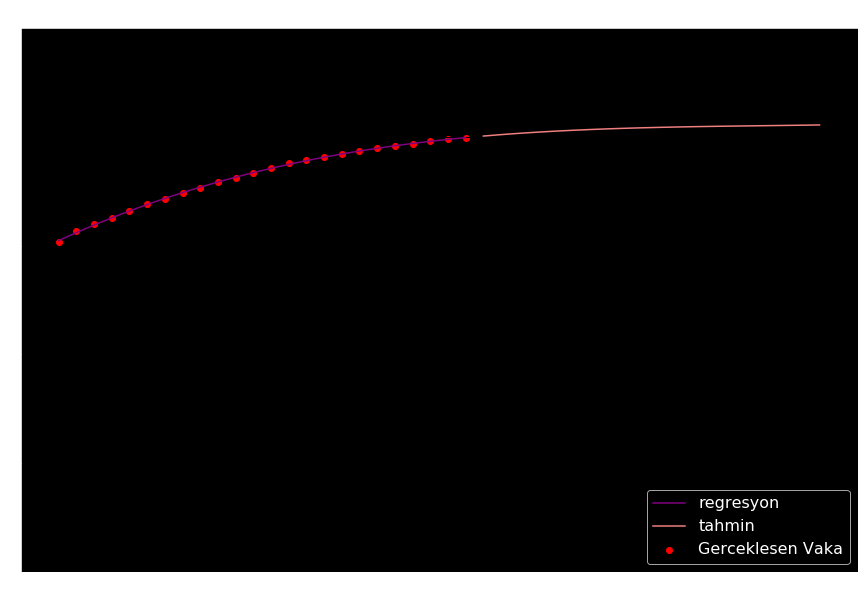

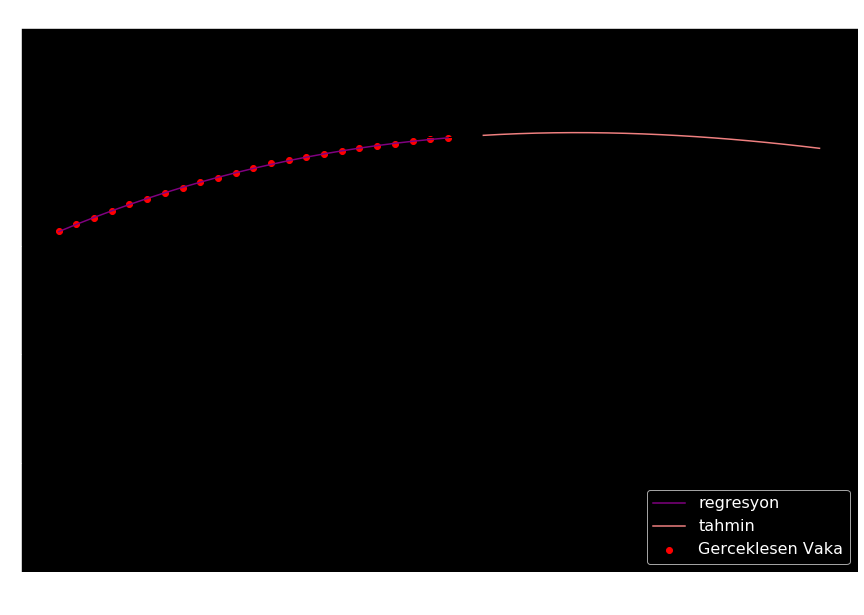

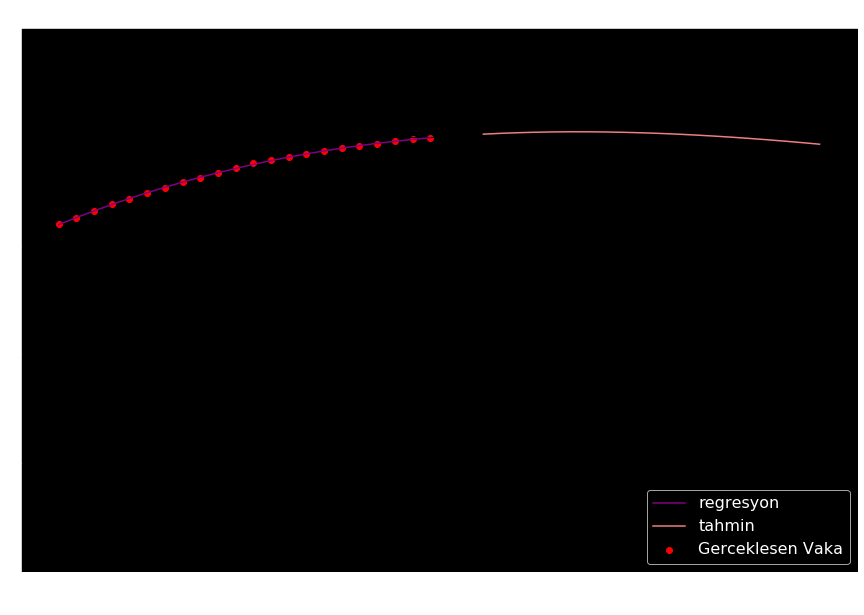

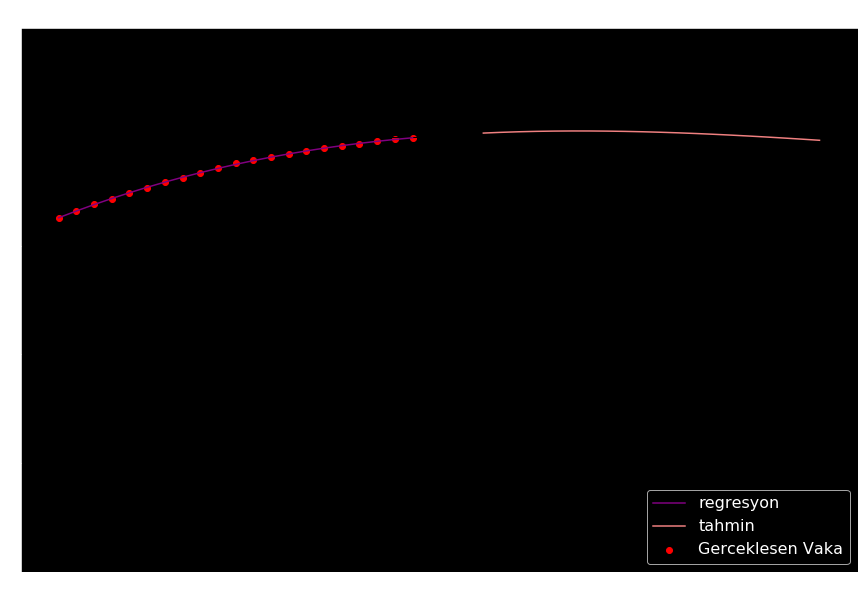

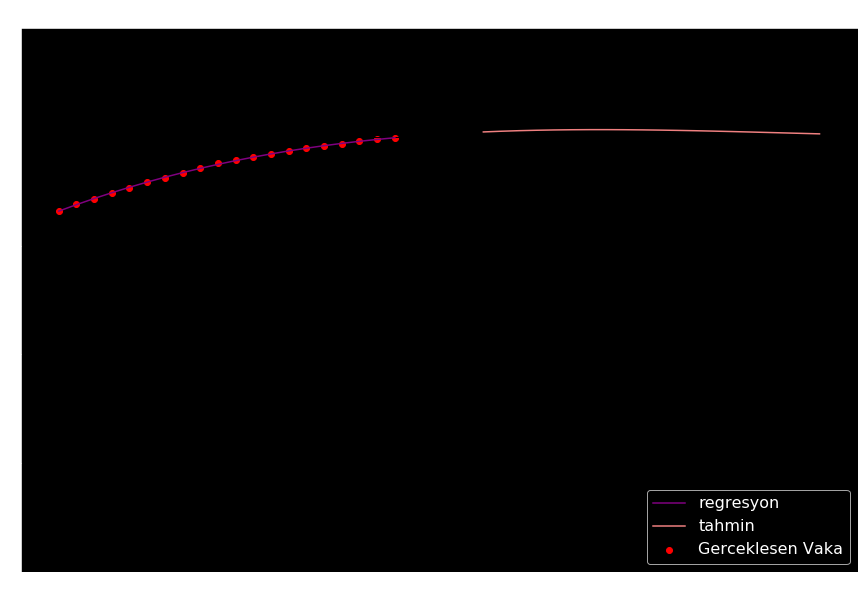

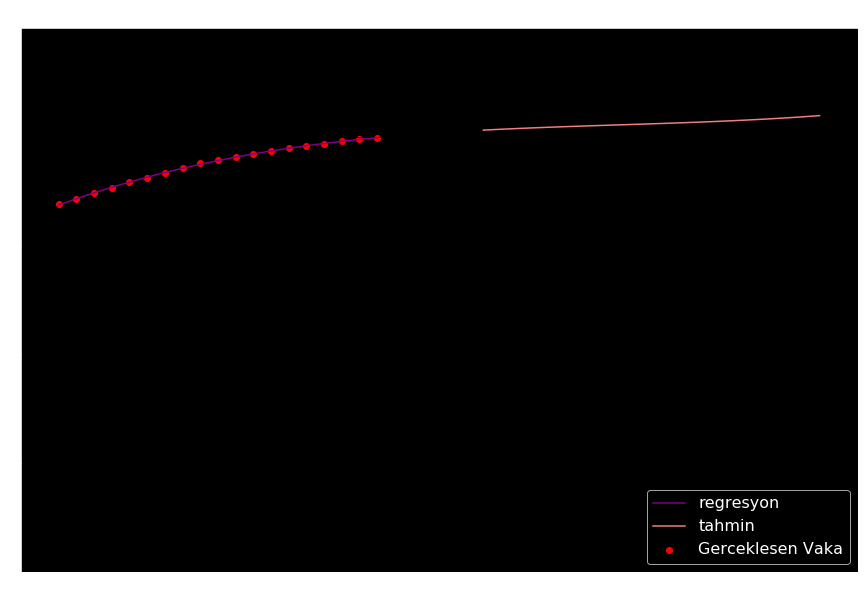

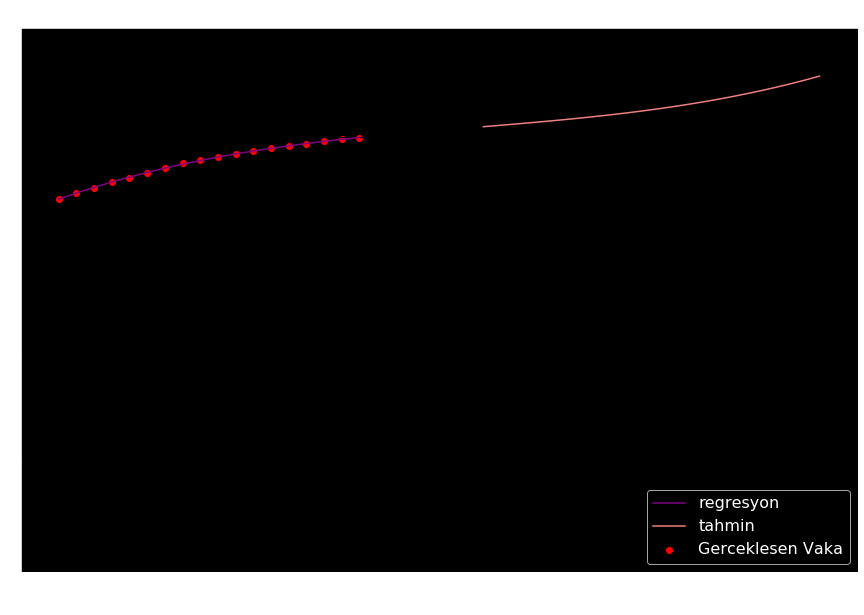

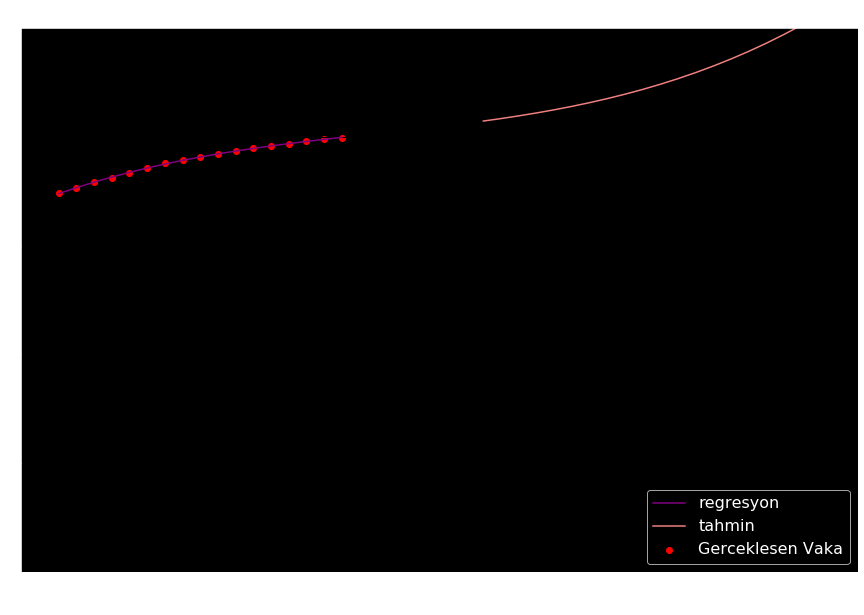

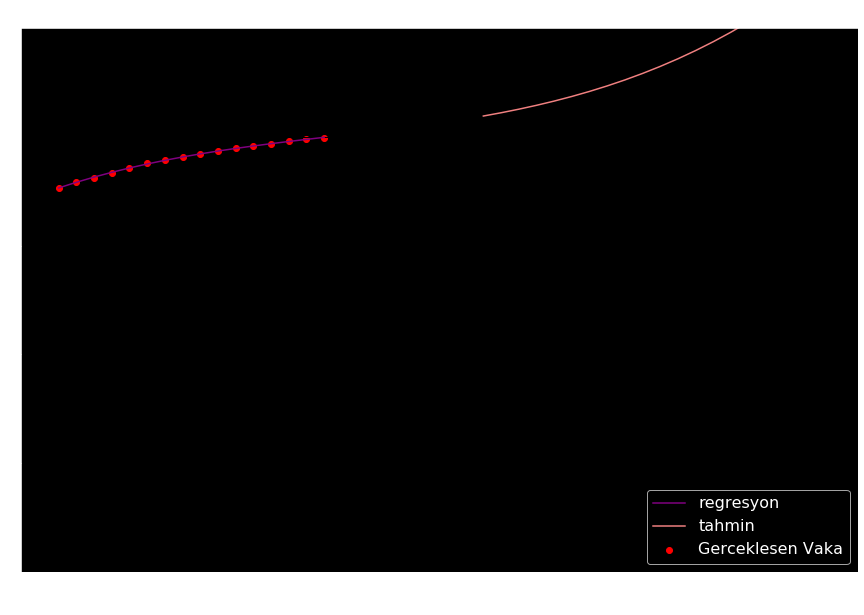

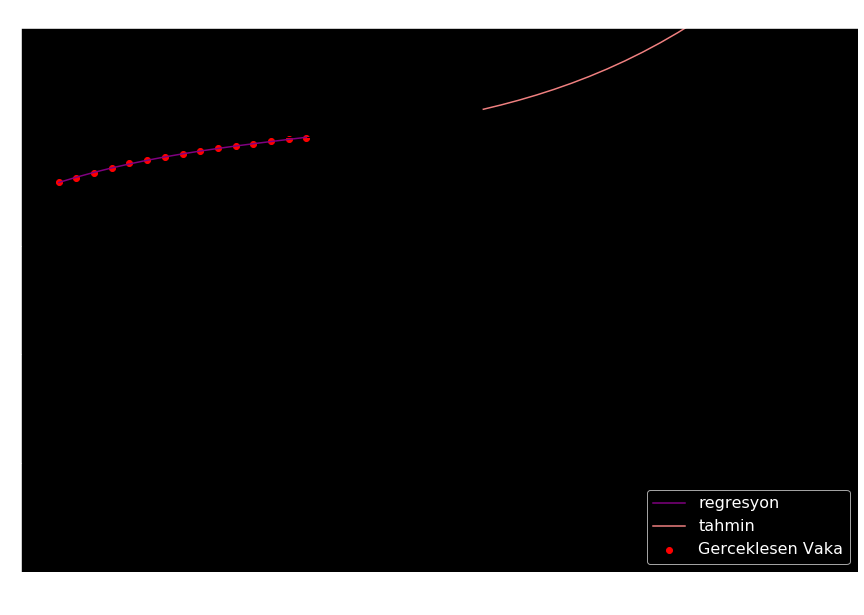

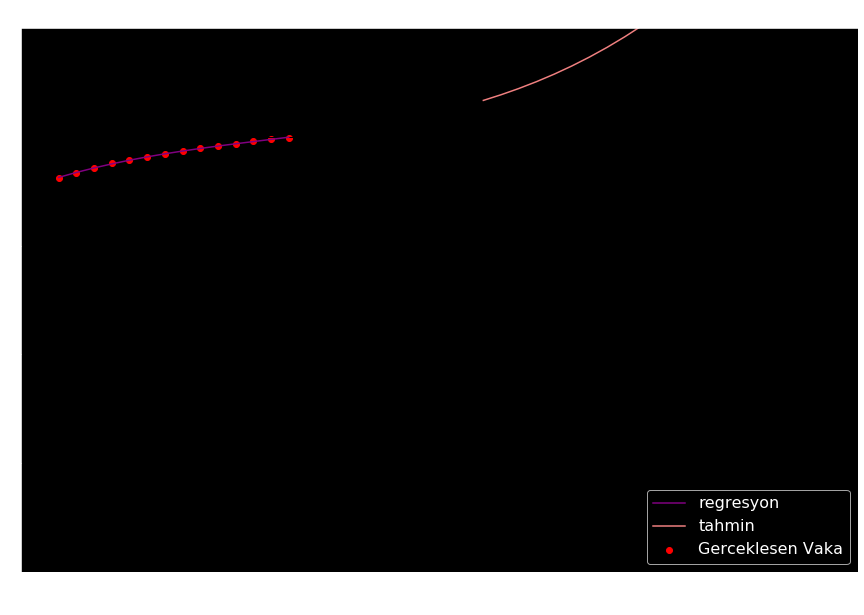

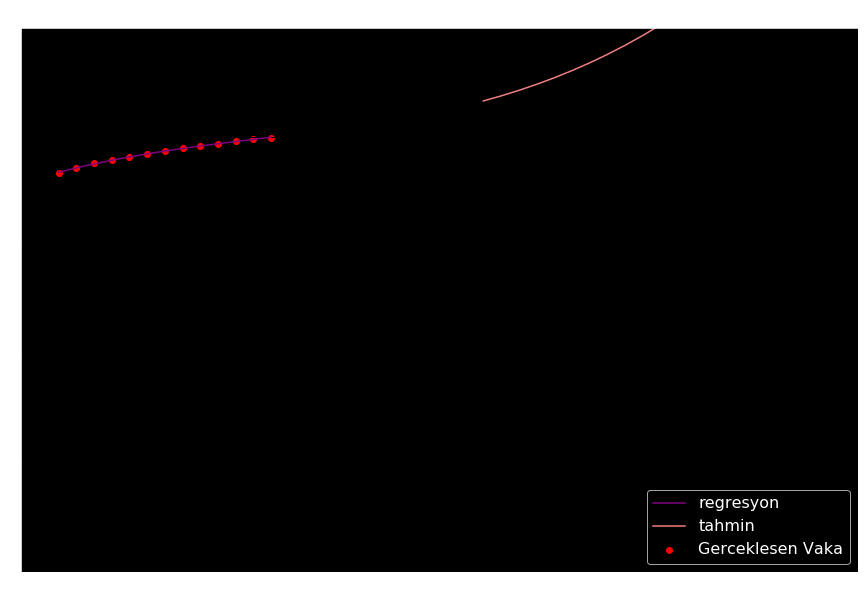

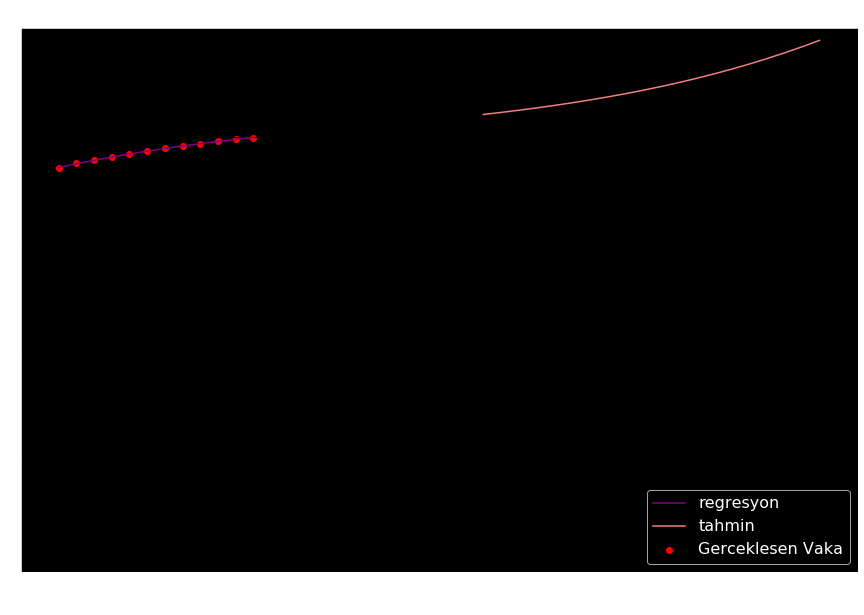

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_regression = PolynomialFeatures(degree=3)

df5 = pd.read_excel('/home/onurhdogan/Documents/covid/tr3.xlsx')
df5.tr = np.log10(df5.tr)

path = "/home/onurhdogan/Documents/covid/pngler/"
for i in range(30):
    plt.figure(figsize=(15,10))
    i = i+1
    x = df5.gun.values.reshape(-1,1)
    y = df5.tr.values.reshape(-1,1)  
    x = x[i:i+25]
    y = y[i:i+25]

    x_polynomial = polynomial_regression.fit_transform(x)
    linear_regression2 = LinearRegression()
    linear_regression2.fit(x_polynomial,y)

    y_head2 = linear_regression2.predict(x_polynomial)

    #x_yeni = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
    x_yeni = np.arange(i+25,i+45)
    x_yeni_ = np.array(x_yeni).reshape(-1,1)

    x_polynomial_tahmin = polynomial_regression.fit_transform(x_yeni_)

    y_head3 = linear_regression2.predict(x_polynomial_tahmin)
    plt.title("Covid 19 Turkiye Vaka Sayısı Polinom Regresyon Modeli",fontsize=20)
    plt.xlabel("ilk Vakadan itibaren Gun sayısı",fontsize=16)
    plt.axhline(y=5,color="k",linewidth=1)

    plt.scatter(x,y,color="red",label="Gerceklesen Vaka") #,label="vaka")
    plt.plot(x,y_head2,label="regresyon")
    plt.plot(x_yeni_,y_head3,label="tahmin")
    plt.legend(loc=4,fontsize=16)

    plt.xticks(x)
    
    plt.ylim(1,6)
    
    plt.savefig(path+"a"+str(i)+".png")

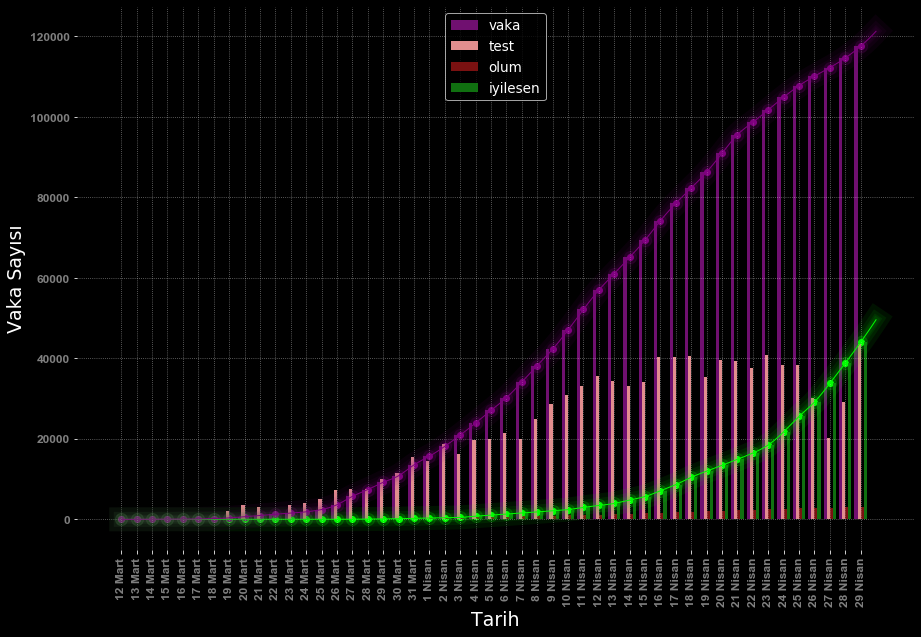

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

plt.figure(figsize=(15,10))
df3 = pd.read_excel('/home/onurhdogan/Documents/covid/CovidSon.xlsx')
df4 = pd.melt(df, id_vars="tarih", value_name="values")
df4.head()

flatui = ["purple", "lightcoral", "darkred", "green"]
sns.set_palette(flatui)

ax1 = plt.axes()

m= sns.barplot(x="tarih",y="values",data=df1,hue="variable",ax=ax1,palette = sns.color_palette())
plt.style.use('dark_background')
plt.grid(linestyle='dotted',alpha=0.5)
plt.xticks(fontname='Arial', fontsize=12, weight='bold', alpha=0.5,rotation=90)
plt.yticks(fontname='Arial', fontsize=12, weight='bold', alpha=0.5)
plt.box(False)
ax1.legend(fontsize=13.5,loc=9)
ax1.set_xlabel("Tarih",fontsize=19)
ax1.set_ylabel("Vaka Sayısı",fontsize=19)

df4.tarih = df4.tarih.astype(str)
x=df3.tarih
y=df3.iyilesen
y2 = df3.vaka

x=np.arange(49)
y=np.array(y)

x_new = np.linspace(0, len(df3.tarih), (x.size*30))
#x_new = np.linspace(x.min(), x.max(), (x.size*30))
a_BSpline = make_interp_spline(x, y)
y_new = a_BSpline(x_new)

x_new = np.linspace(0, len(df3.tarih), (x.size*30))
#x_new = np.linspace(x.min(), x.max(), (x.size*30))
a_BSpline = make_interp_spline(x, y2)
y_new2 = a_BSpline(x_new)

plt.plot(x_new, y_new, linewidth=6,alpha=0.075, color='lime')
plt.plot(x_new, y_new, linewidth=9,alpha=0.075, color='lime')
plt.plot(x_new, y_new, linewidth=15,alpha=0.075, color='lime')
plt.plot(x_new, y_new, linewidth=24,alpha=0.075, color='lime')
plt.plot(x_new, y_new, linewidth=1,color='lime')

plt.plot(x_new, y_new2, linewidth=6,alpha=0.075, color='purple')
plt.plot(x_new, y_new2, linewidth=9,alpha=0.075, color='purple')
plt.plot(x_new, y_new2, linewidth=15,alpha=0.075, color='purple')
plt.plot(x_new, y_new2, linewidth=24,alpha=0.075, color='purple')
plt.plot(x_new, y_new2, linewidth=1,color='purple')

plt.scatter(x,y,alpha=0.14, color='lime', s=150)
plt.scatter(x,y,color='lime')

plt.scatter(x,y2,alpha=0.14, color='purple', s=150)
plt.scatter(x,y2,color='purple')

plt.savefig("/home/onurhdogan/Desktop/Covid2.pdf",type="pdf",dpi=300)